<a href="https://colab.research.google.com/github/rakibulalamshamim/MAT120lab/blob/main/Lab5_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equation (ODE)
We'll look into

1. First order ODE:
> 1. $\frac{dx}{dt}=v(t) \ \ $ is an example first order ODE. If $v$ is constant of time, the solution of this ODE is $x = vt + C \ \ $. Where $C$ is some arbitrary constant fixed by **initial condition**. \\
> 2. Another example is the radioactive decay equation:
$\frac{dN}{dt}= -\lambda N$. Whose solution is given by $N= N_0e^{-\lambda t}$. \\

2. Second order ODE:
> 1. Newaton's equation of motion: $F=ma \ \ $ or,  $\ \ \frac{d^2x}{dt^2}=F/m$.
> 2. Simple Harmonic Oscillator (Hooke's law: $F=-kx) \ \ $, the ODE is $\ \ \frac{d^2x}{dt^2}=-\frac{k}{m}x$. The $sol^n$ is $x= A \sin(\omega t) \ \ $ or,  $x= B \cos(\omega t) \ \ $ with $\ \ \omega = \sqrt{k/m}$.
> 3. 1D Schrödinger equation: $$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+ V(x)\psi= E\psi$$
The solution depends on the potential $V(x)$.




## Initial conditions:
For First order ODE, we need only one initial condition. But for second order, we need two.

In [1]:
from sympy import *

#First order ODE

##Let's try
 $\ \ \frac{dN}{dt}= -\lambda N$. \\

You need to first define $N$ as a function of $t$ using `Function('N')(t)` or, `symbols('N', cls=Function)`. Then, convert Sympy expression to Sympy equation using the `Eq(LHS, RHS)` function.

In [65]:
l, t = symbols('lambda t')
N    = symbols('N', cls=Function)
LHS  = diff(N(t),t)
RHS  = -l*N(t)
ode1 = Eq(LHS, RHS)
dsolve(ode1)

Eq(N(t), C1*exp(-lambda*t))

##Initial condition:
$N(0)= N_0 \ \ $, we have $C_1=N_0$. Hence, $\ \ N= N_0e^{-\lambda t}$. \\

Now, let $N(0)= N_0= 5000$

In [63]:
initial_condition= {N(0): 5000}
decay= dsolve(ode1, ics= initial_condition)
decay

Eq(N(t), 5000*exp(-lambda*t))

###To plot, let $\lambda=0.1$

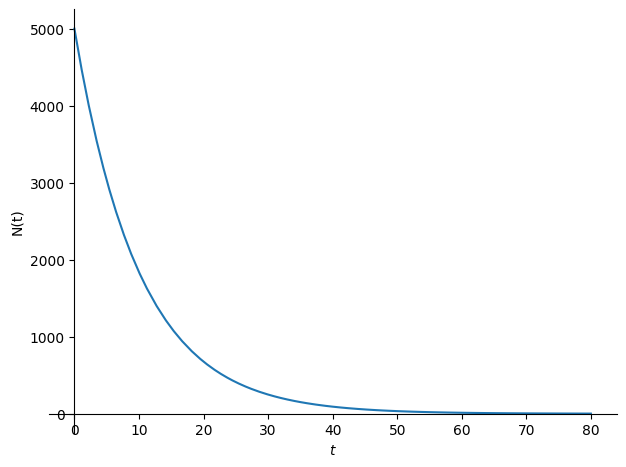

In [62]:
decay = decay.subs(l,0.1)
plot(decay.rhs, (t,0,80), ylabel = 'N(t)')

## $\frac{dy}{dx}=y(1-x^2)$
Initial condition: $y(0)=1$

In [64]:
x = symbols('x')
y = symbols('y', cls=Function)
LHS = diff(y(x),x)
RHS = y(x)*(1-x**2)
eqn = Eq(LHS, RHS)
IC = {y(0):1}
ode= dsolve(eqn, ics=IC)
ode

Eq(y(x), exp(x*(1 - x**2/3)))

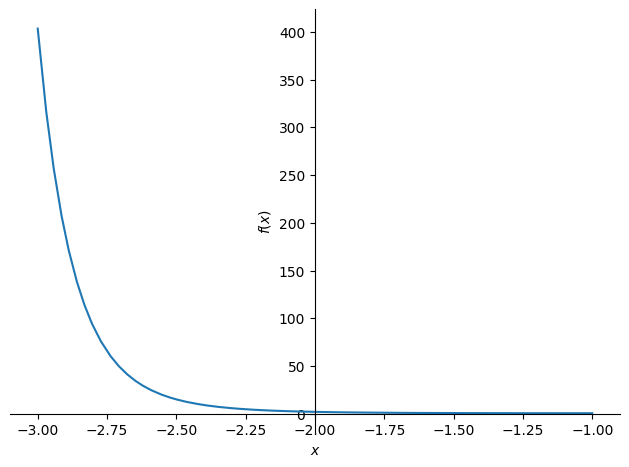

In [59]:
plot(ode.rhs, (x,-3, -1))

# Classwork: Solve $$\frac{dx}{dt}=10-5t$$
Initial Condition= $x(0)=0$. And then plot it.

## A falling ball with mass $m$ under quadratic drag, *i.e.*  force due to air resistance $F_D= q v^2$. Equation of motion: $F= mg - F_D$. Or,
$$m\frac{dv}{dt}=mg-qv^2$$

In [ ]:
m, g, q = symbols('m g q')
t= symbols('t')
v = symbols('v', cls=Function)
LHS = m*diff(v(t), t)
RHS = m*g - q*v(t)**2
eqn = Eq(LHS, RHS)
d= dsolve(eqn)
d

Eq(v(t), -sqrt(g)*sqrt(m)/(sqrt(q)*tanh(sqrt(g)*sqrt(q)*log(exp(C1*m - 2*t))/(2*sqrt(m)))))

##Classwork: Linear drag problem
Solve the previous problem with Stoke's formula for air resistance, $F_D= qv$ with initial condition: $v(0)=0$. Also take $m=10$, $q=0.5$, $g=9.8$. Then plot $v(t)$ vs. $t$.$$m\frac{dv}{dt}=mg-qv$$

In [47]:
m, g, q = 10, 9.8, 0.5
t= symbols('t')
v = symbols('v', cls=Function)
LHS = m*diff(v(t), t)
RHS = m*g - q*v(t)
eqn = Eq(LHS, RHS)
IC  = {v(0):0}
d= dsolve(eqn, ics=IC)
d

Eq(v(t), 196.0 - 196.0*exp(-0.05*t))

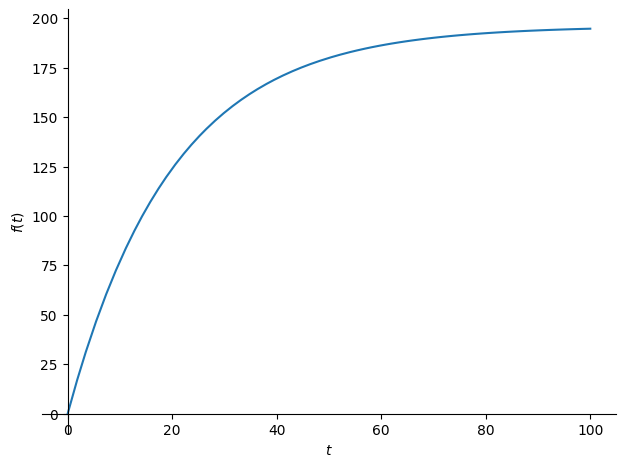

In [49]:
plot(d.rhs, (t,0,100))

#Second order ODE:

##Simple Harmonic Oscillator: $\ \ \frac{d^2x}{dt^2}+\omega^2x=0 \ \ $ with $\ \ \omega=\sqrt{k/m}$


In [74]:
o, t = symbols('omega t')
x    = symbols('x', cls=Function)
ddx  = diff(x(t),t,2)
LHS  = ddx + o**2*x(t)
ode2 = Eq(LHS, 0)
dsolve(ode2)

Eq(x(t), C1*exp(-I*omega*t) + C2*exp(I*omega*t))

###Let $\omega=2$ and the initial conditions: $x(0)=0 \ \ $ and $\ \ \dot{x}(o)=10$.

In [79]:
t    = symbols('t')
x    = symbols('x', cls=Function)
ddx  = diff(x(t),t,2)
LHS  = ddx + 2**2*x(t)
ode2 = Eq(LHS, 0)
dsolve(ode2)

Eq(x(t), C1*sin(2*t) + C2*cos(2*t))

In [80]:
IC   = {x(0): 0, diff(x(t),t).subs(t,0):10}           # Initial Conditions
dsolve(ode2, ics=IC)

Eq(x(t), 5*sin(2*t))

## Damped Harmonic Oscillator: $F= -kx - 2m\lambda v$
$$\frac{d^2x}{dt^2}+2\lambda \frac{dx}{dt}+\omega^2x=0$$

In [ ]:
l,o = symbols('lambda omega')
x   = symbols('x', cls=Function)
dx  = diff(x(t), t)
ddx = diff(x(t), t, 2)
LHS = ddx + 2*l*dx + o**2*x(t)
eqn2= Eq(LHS, 0)
dsolve(eqn2)

Eq(x(t), C1*exp(t*(-lambda + sqrt(lambda**2 - omega**2))) + C2*exp(-t*(lambda + sqrt(lambda**2 - omega**2))))

## Iinitial Conditions: $x(0)=0$, $\ \ \dot{x}(0)=10$

In [ ]:
IC   = {x(t).subs(t,0): 0, diff(x(t),t).subs(t,0):10}
damped_SH = dsolve(eqn2, ics=IC)
damped_SH

Eq(x(t), 5*exp(t*(-lambda + sqrt(lambda**2 - omega**2)))/sqrt(lambda**2 - omega**2) - 5*exp(-t*(lambda + sqrt(lambda**2 - omega**2)))/sqrt(lambda**2 - omega**2))

###Let $\lambda=5$ and $\ \ \omega=3$

In [ ]:
damped_SH = damped_SH.subs({l:5, o:3})
damped_SH

Eq(x(t), 5*exp(-t)/4 - 5*exp(-9*t)/4)

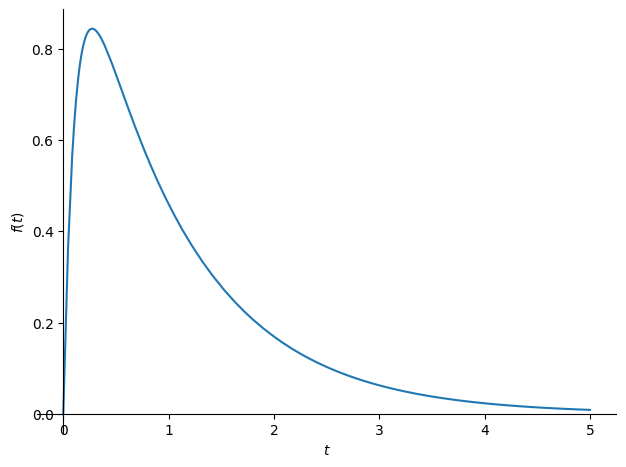

In [ ]:
plot(damped_SH.rhs, (t,0,5))

## The linear drag problem revisited: $F= mg - F_D$ with $F_D= qv$:
$$ \begin{align}
&m\frac{d^2y}{dt^2} = mg - qv \\
\text{or,} \ \ \ &m\frac{d^2y}{dt^2} + q \frac{dy}{dt}- mg=0
\end{align} $$

In [51]:
m, q, g = symbols('m q g')
y       = symbols('y', cls=Function)
dy      = diff(y(t), t)
ddy     = diff(y(t), t, 2)

LHS     = m*ddy + q*dy - m*g
ode3    = Eq(LHS, 0)
dsolve(ode3)

Eq(y(t), C1 + C2*exp(-q*t/m) + g*m*t/q)

###Initial Conditions:
$y(0)=100$, $\ \ \dot{y}(0)=0$

In [53]:
IC = {y(0):-100, dy.subs(t,0):0}
dsolve(ode3, ics=IC)

Eq(y(t), g*m**2*exp(-q*t/m)/q**2 + g*m*t/q + (-g*m**2 - 100*q**2)/q**2)

###Insert $m=10$, $q=0.5$, $g=9.8$

In [55]:
lin_drag= dsolve(ode3, ics=IC)
lin_drag= lin_drag.subs({m:10, q: 0.5, g:9.8})
lin_drag

Eq(y(t), 196.0*t - 4020.0 + 3920.0*exp(-0.05*t))

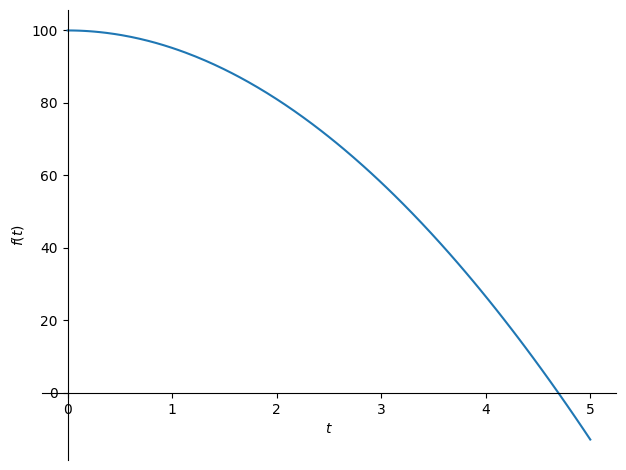

In [57]:
plot(-lin_drag.rhs, (t, 0, 5))

#Numerical Methods for Solving ODE: Euler's Method
Let's consider the first order ODE
$$\frac{dx(t)}{dt}=f(t,x)$$
with the initial condition: $x(t_0)=x_0$. After a small duration $h$, the new time is $t_1=t_0+h$. We can obtain $x_1\equiv x(t_1)$ using Euler formula given by, $x_{1}= x_0 + h f(t_0,x_0)$. And then use this to find $x_{2}= x_1 + h f(t_1,x_1)$ and so on. \\

In fact, at any time $t_{i+1}=t_i+h$, the value of $x_{i+1}$ can be found using the value of previous result $x_i$ and $t_i$.
$$x_{i+1}= x_i + h f(t_i,x_i)$$

## Let's solve Solve $$\frac{dx}{dt}=10-4t$$
Initial Condition: $x(0)=0$. Plot $x(t)$ from $t=0$ to $t=5$

Here, $f(t,x)=10-4t$. Whose solution is $x(t)=10t-2t^2$

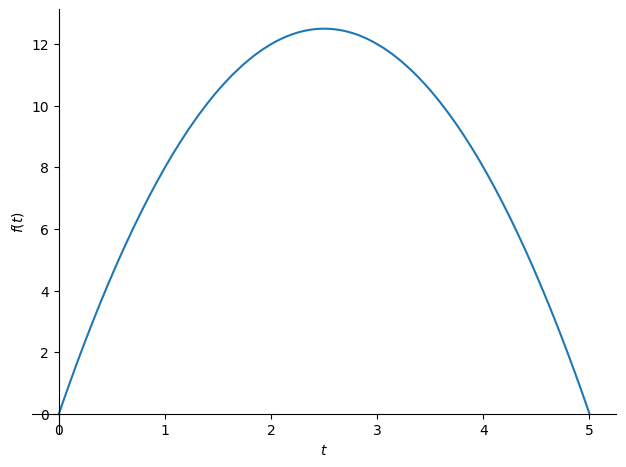

In [40]:
t, x = symbols('t'), symbols('x', cls=Function)
LHS = diff(x(t),t)
RHS = 10-4*t
eqn = Eq(LHS, RHS)
IC  = {x(0):0}
exact = dsolve(eqn, ics=IC)
plot(exact.rhs, (t,0,5))

## Solving this equation using Euler's Method

<function matplotlib.pyplot.show(close=None, block=None)>

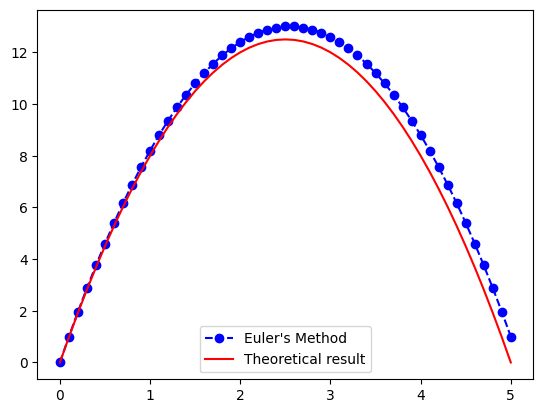

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,x): return 10 -4*t

t0, tn, n = 0, 5, 50
h = (tn-t0)/n                                               # Step size
t = np.linspace(t0, tn, n+1)

x = np.zeros(len(t))                                        # Creates an array of zeros of equal length as array t.
x[0] = 0                                                    # Initial Condition

for i in range(0, n):
    x[i + 1] = x[i] + h*f(t[i], x[i])                       # It changes the zeroes to x[i+1]

plt.plot(t, x, 'bo--', label="Euler's Method")
plt.plot(t, 10*t-2*t**2,'r', label='Theoretical result')
plt.legend()
plt.show

## Now, let's solve the decay equation $$\frac{dN}{dt}= -0.1 N$$
with initial condition $N(0)=5000$. Here, $f(t,N)=-0.1N$

<function matplotlib.pyplot.show(close=None, block=None)>

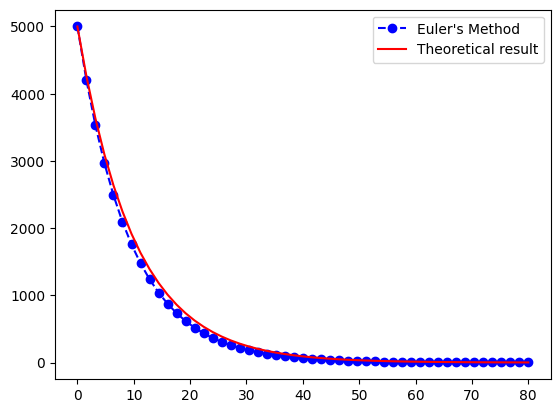

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,N): return -0.1*N

t0, tn, n = 0, 80, 50
h = (tn-t0)/n                                               # Step size
t = np.linspace(t0, tn, n+1)

N = np.zeros(len(t))                                        # Creates an array of zeros of equal length as array t.
N[0] = 5000                                                 # Initial Condition

for i in range(0, n):
    N[i + 1] = N[i] + h*f(t[i], N[i])                       # It changes the zeroes to x[i+1]

plt.plot(t, N, 'bo--', label="Euler's Method")
plt.plot(t, 5000*np.exp(-0.1*t),'r', label='Theoretical result')
plt.legend()
plt.show